## Anggota Kelompok (3B)

1. Achmad Wibawa
2. Ahmad Abid Baihaqi
3. Ahmad Thariq Ramadhan
4. Dewangga Putra Yusafa
5. Maulana Rosandy
6. Moch Fajrul

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
#cek null
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [4]:
#cek duplikasi data
df.duplicated().sum()

0

In [5]:
import nltk
import re

In [6]:
def casefolding(tweet):
    tweet = tweet.lower()
    return tweet

In [7]:
def filtering(tweet):
    # Remove link web
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove @username
    tweet = re.sub('@[^\s]+', '', tweet)
    # Remove #tagger
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', tweet)
    tweet = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", tweet)
    # Remove simbol, angka dan karakter aneh
    tweet = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*@]", " ", tweet)
    return tweet

In [8]:
# def tokenize(tweet):
#     token = nltk.word_tokenize(tweet)
#     return token
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()

def tokenize(tweet):
    tokens = token.tokenize(tweet)
    return tokens

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

sw = stopwords.words("english")
def removeStopword(tweet):
    filteredtweet = [word for word in tweet.split() if word not in sw]
    ps=nltk.porter.PorterStemmer()
    temmed_words = [ps.stem(w) for w in filteredtweet]
    tweet = " ".join(temmed_words)
    return tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def preprocessing(tweet):
    #casefolding
    tweet = casefolding(tweet)
    #filterring
    tweet = filtering(tweet)
    #stemming withstop words
    # tweet = stemming(tweet)
    tweet = removeStopword(tweet)
    #tokenizing
    # tweet = tokenize(tweet)

    return tweet


In [11]:
dte = pd.read_csv('data/tweet_emotions.csv')

dte['hasil'] = dte['content'].apply(preprocessing)

dte.head(100)

,tweet_id,sentiment,content,hasil
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh waitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one
...,...,...,...,...
95,1956989514,sadness,@sweeetnspicy hiii im on my ipod...i cant fall...,hiii im ipod cant fall asleep
96,1956989526,sadness,dont wanna work 11-830 tomorrow but i get paid,dont wanna work tomorrow get paid
97,1956989560,sadness,feels sad coz i wasnt able to play with the gu...,feel sad coz wasnt abl play guy
98,1956989561,neutral,PrinceCharming,princecharm


In [12]:
dte["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [13]:
# encoding label
from sklearn.preprocessing import LabelEncoder

# Inisiasi label encoder
encode = LabelEncoder()

#Encode labels
dte['sentiment'] = encode.fit_transform(dte['sentiment'])
dte.head()

,tweet_id,sentiment,content,hasil
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh waitin call
2,1956967696,10,Funeral ceremony...gloomy friday...,funer ceremoni gloomi friday
3,1956967789,3,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,8,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(dte["hasil"])
y = dte["sentiment"]

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [63]:
# from sklearn.svm import SVC

# from sklearn.metrics import accuracy_score

# model = SVC()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# score = accuracy_score(y_test, y_pred)
# print(score)

In [64]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score,classification_report

# # C-Support Vector Classification
# svc = SVC()

# # Trainingg
# svc.fit(X_train,y_train)

# #prediksi data testing
# y_pred_test = svc.predict(X_test)

# #prediksi data training
# y_pred_train = svc.predict(X_train)  

# # Evaluasi akurasi data training
# acc_train = accuracy_score(y_train, y_pred_train)

# # Evaluasi akurasi data training
# acc_test = accuracy_score(y_test, y_pred_test)

# # Menghitung Precission
# precission = precision_score(y_test, y_pred_test, average='weighted',zero_division=0)

# # print(classification_report(y_test, y_pred_test, target_names=dte.keys(),zero_division=0))

# # # Print hasil evaluasi
# # print(f'Hasil akurasi data train: {acc_train}')
# print(f'Hasil akurasi data test: {acc_test}')
# print(f'Hasil presisi data test: {precission}')

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.43203125
Hasil akurasi data test: 0.305125


Text(114.0, 0.5, 'Truth')

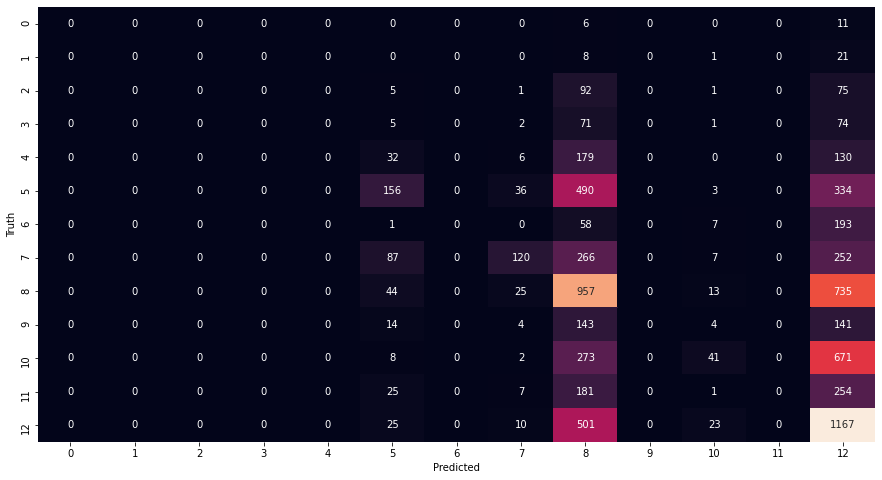

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(y_test, y_pred_test)
plt.figure (figsize=(15,8))
sns.heatmap(mat, annot=True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Kesimpulan**

Dari hasil percobaan diatas menggunakan model Multinominal naive bayes dapat menghasilkan akurasi yang cukup rendah yaitu hasil akurasi data train 43% dan akurasi data test 30% 